# Treinamentos de Detecção de Anomalias para geração de matriz de confusão com exclusão de extremos

In [1]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score
from sklearn.metrics import f1_score,accuracy_score,precision_score,recall_score
import matplotlib.pyplot as plt
from pyod.utils.data import evaluate_print
import pandas as pd
import os
import numpy as np

tabelafinal = pd.DataFrame(columns=['algoritmo','contaminacao','acuracia','precisao','recall','fn','fp'])
print(tabelafinal)

def get_confusion_matrix(reais, preditos, labels):
    """
    Uma função que retorna a matriz de confusão para uma classificação binária
    
    Args:
        reais (list): lista de valores reais
        preditos (list): lista de valores preditos pelo modelos
        labels (list): lista de labels a serem avaliados.
            É importante que ela esteja presente, pois usaremos ela para entender
            quem é a classe positiva e quem é a classe negativa
    
    Returns:
        Um numpy.array, no formato:
            numpy.array([
                [ tp, fp ],
                [ fn, tn ]
            ])
    """
    # não implementado
    if len(labels) > 2:
        return None

    if len(reais) != len(preditos):
        return None
    
    # considerando a primeira classe como a positiva, e a segunda a negativa
    true_class = labels[0]
    negative_class = labels[1]

    # valores preditos corretamente
    tp = 0
    tn = 0
    
    # valores preditos incorretamente
    fp = 0
    fn = 0
    
    for (indice, v_real) in enumerate(reais):
        v_predito = preditos[indice]

        # se trata de um valor real da classe positiva
        if v_real == true_class:
            tp += 1 if v_predito == v_real else 0
            fp += 1 if v_predito != v_real else 0
        else:
            tn += 1 if v_predito == v_real else 0
            fn += 1 if v_predito != v_real else 0
    
    return np.array([
        # valores da classe positiva
        [ tp, fp ],
        # valores da classe negativa
        [ fn, tn ]
       
    ])

def acuracia(mc):
  tp = mc[1,1]
  tn = mc[0,0]
  fp = mc[0,1]
  fn = mc[1,0]
  acuracia = (tp+tn)/(tp+fp+tn+fn)
  return acuracia

def recall(mc): 
  tp = mc[1,1]
  fn = mc[1,0]
  return tp/(tp+fn)

def precisao(mc):
  tp = mc[1,1]
  fp = mc[0,1]
  return tp/(tp+fp) 

def fscore(precisao,recall):
  return 2*((precisao*recall)/(precisao+recall))

def avalia(clf_name,Y,y_train_scores,y_train_pred):
    # Avalia e imprime os resultados
    print("Avaliação do modelo "+clf_name+":")
    evaluate_print(clf_name, Y, y_train_scores)
    mc=get_confusion_matrix(reais=Y, preditos=clf.labels_ , labels=[0,1])
    print('Acurácia='+str(acuracia(mc)*100))   
    print('Precisão='+str(precisao(mc)*100))
    print('Recall='+str(recall(mc)*100))
    print('Falso Positivo='+str(mc[0,1]))
    print('Falso Negativo='+str(mc[1,0]))
    print('True Positivo='+str(mc[1,1]))
    print('True Negativo='+str(mc[0,0]))
    print('F1-score='+str(f1_score(Y,y_train_pred)*100))
    print('ROC='+str(roc_auc_score(Y,y_train_scores)))

def gera_matriz_de_confusao(Y,y_train_pred,clf_name):
    cm = confusion_matrix(Y,y_train_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal','Anomalia'])
    disp.plot(cmap=plt.cm.Blues)
    disp.ax_.set(title='Matriz de Confusão do '+clf_name,xlabel='Valores preditos', ylabel='Valores reais')
    plt.show()
      
def calcula_anomalias(clf_name,parametros):
    menorfp=len(X)
    melhoracuracia=0
    mcont=0
    contamination=0.01
    while contamination<0.16:
        funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
        clf = eval(funcao)
        clf.fit(X)
        mc=get_confusion_matrix(reais=Y, preditos=clf.labels_ , labels=[0,1])
        ac=acuracia(mc)
        fp=mc[0,1]  
        if fp<menorfp:
           mcont=contamination
           menorfp=fp
           melhoracuracia=ac
        else:
            if fp==menorfp:
                if ac>melhoracuracia:
                   mcont=contamination
                   menorfp=fp
                   melhoracuracia=ac                
        contamination=contamination+0.01
    contamination=mcont
    print('Contaminação utilizada='+str(contamination))
#    clf = eval(funcao)
#   clf.fit(X)
    return contamination

def grava_avaliacao(clf_name,Y,y_train_scores,y_train_pred,contamination):
    # Avalia e imprime os resultados
    print("Avaliação do modelo "+clf_name+":")
    evaluate_print(clf_name, Y, y_train_scores)
    mc=get_confusion_matrix(reais=Y, preditos=clf.labels_ , labels=[0,1])
    ac=round(acuracia(mc)*100,2)
    print('Acurácia='+str(ac))   
    pc=round(precisao(mc)*100,2)
    print('Precisão='+str(pc))
    rc=round(recall(mc)*100,2)
    print('Recall='+str(rc))
    fn=mc[1,0] 
    fp=mc[0,1]
    print('Falso Negativo='+str(fn))
    print('Falso Positivo='+str(fp))
    tabelafinal.loc[len(tabelafinal.index)] = [clf_name,contamination,ac,pc,rc,fn,fp] 

Empty DataFrame
Columns: [algoritmo, contaminacao, acuracia, precisao, recall, fn, fp]
Index: []


# Carrega dados de arquivo CSV  
Separando catmat_id= 445485 -> Descrição:'ÁGUA MINERAL NATURAL, TIPO SEM GÁS MATERIAL EMBALAGEM PLÁSTICO TIPO EMBALAGEM 
RETORNÁVEL', Grupo: '89', SUBSISTÊNCIA Classe: '8960', BEBIDAS NÃO ALCOÓLICAS PDM: '19555', ÁGUA MINERAL NATURAL

In [2]:
def load_itens(path):
    csv_path = os.path.join(path,"aguatabela2.csv")
    return pd.read_csv(csv_path)

df=load_itens(".")
df = df.drop(['data'],axis=1)
print(df)
dfajustado=df

     quantidade  valor_unitario  anomalia
0           420           12.00         0
1         28000            5.88         1
2           360            7.70         0
3           120            7.70         0
4          2985            4.20         0
..          ...             ...       ...
389        1440           11.37         0
390        4608            0.62         1
391        1440           10.58         0
392        4608            0.54         1
393          10           20.00         1

[394 rows x 3 columns]


# Pré-processamento retira os 2,5% menores valores e os 2,5% maiores valores

In [3]:
dfajuste= df['valor_unitario']
menor=dfajuste.quantile(0.025)
maior=dfajuste.quantile(0.975)
print(menor)
print(maior)
dfajuste2= df['quantidade']
menorqtd=dfajuste2.quantile(0.05)
maiorqtd=dfajuste2.quantile(0.95)
print(menorqtd)
print(maiorqtd)
dfajustado=df.loc[df["valor_unitario"] > menor]
dfajustado=dfajustado.loc[dfajustado["valor_unitario"] < maior]
dfajustado=dfajustado.loc[dfajustado["quantidade"] > menorqtd]
dfajustado=dfajustado.loc[dfajustado["quantidade"] < maiorqtd]
print(dfajustado)
print(dfajustado.describe())

2.44925
19.159500000000005
36.0
7381.699999999993
     quantidade  valor_unitario  anomalia
0           420           12.00         0
2           360            7.70         0
3           120            7.70         0
4          2985            4.20         0
5          1500            6.49         0
..          ...             ...       ...
386        5000            7.05         0
387        5000           10.45         0
388        4000           13.45         0
389        1440           11.37         0
391        1440           10.58         0

[343 rows x 3 columns]
        quantidade  valor_unitario    anomalia
count   343.000000      343.000000  343.000000
mean   1355.413994        9.016735    0.081633
std    1594.983984        3.003284    0.274204
min      40.000000        2.850000    0.000000
25%     200.000000        6.995000    0.000000
50%     612.000000        8.470000    0.000000
75%    2000.000000       11.000000    0.000000
max    7318.000000       19.100000    1.000000

# Separação do Label dos dados

In [4]:

X = dfajustado.iloc[:, :-1]
Y = dfajustado.iloc[:, -1]
print(X)
print(Y)

     quantidade  valor_unitario
0           420           12.00
2           360            7.70
3           120            7.70
4          2985            4.20
5          1500            6.49
..          ...             ...
386        5000            7.05
387        5000           10.45
388        4000           13.45
389        1440           11.37
391        1440           10.58

[343 rows x 2 columns]
0      0
2      0
3      0
4      0
5      0
      ..
386    0
387    0
388    0
389    0
391    0
Name: anomalia, Length: 343, dtype: int64


Contaminação utilizada=0.01
Avaliação do modelo PCA:
PCA ROC:0.8012, precision @ rank n:0.2857
Acurácia=92.4198250728863
Precisão=75.0
Recall=10.714285714285714
Falso Positivo=1
Falso Negativo=25
True Positivo=3
True Negativo=314
F1-score=18.75
ROC=0.8012471655328798



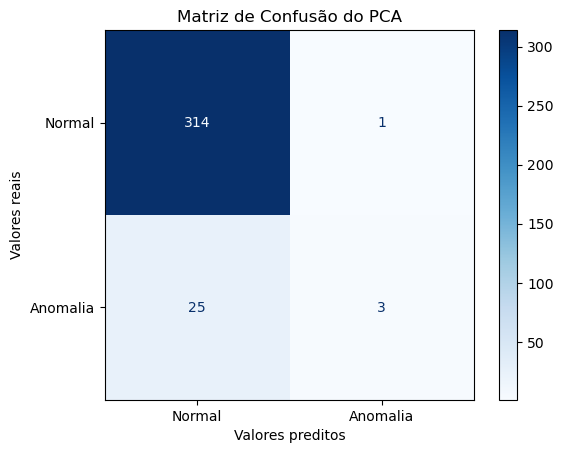

Avaliação do modelo PCA:
PCA ROC:0.8012, precision @ rank n:0.2857
Acurácia=92.42
Precisão=75.0
Recall=10.71
Falso Negativo=25
Falso Positivo=1


In [5]:
from pyod.models.pca import PCA
# Treinar algoritmo PCA para encontrar melhor contaminação
clf_name = 'PCA'
parametros='n_components=2,n_selected_components=2,'
contamination=calcula_anomalias(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

Contaminação utilizada=0.01
Avaliação do modelo OCSVM:
OCSVM ROC:0.545, precision @ rank n:0.0714
Acurácia=90.96209912536443
Precisão=0.0
Recall=0.0
Falso Positivo=3
Falso Negativo=28
True Positivo=0
True Negativo=312
F1-score=0.0
ROC=0.5450113378684807



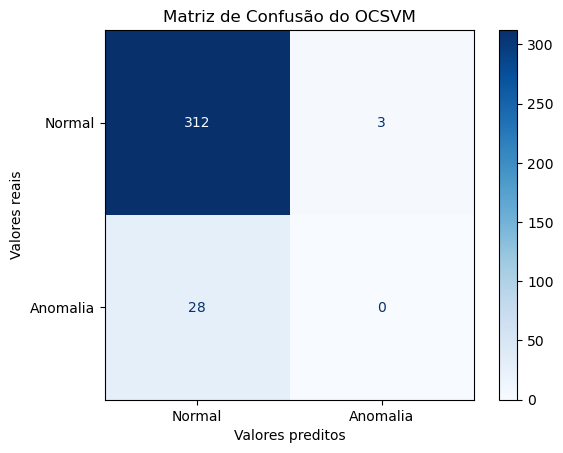

Avaliação do modelo OCSVM:
OCSVM ROC:0.545, precision @ rank n:0.0714
Acurácia=90.96
Precisão=0.0
Recall=0.0
Falso Negativo=28
Falso Positivo=3


In [6]:
from pyod.models.ocsvm import OCSVM
# train OCSVM detector
clf_name = 'OCSVM'
parametros=''
contamination=calcula_anomalias(clf_name,'')

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

35
Contaminação utilizada=0.01
Avaliação do modelo LOF:
LOF ROC:0.8828, precision @ rank n:0.5357
Acurácia=91.83673469387756
Precisão=50.0
Recall=7.142857142857142
Falso Positivo=2
Falso Negativo=26
True Positivo=2
True Negativo=313
F1-score=12.5
ROC=0.882766439909297



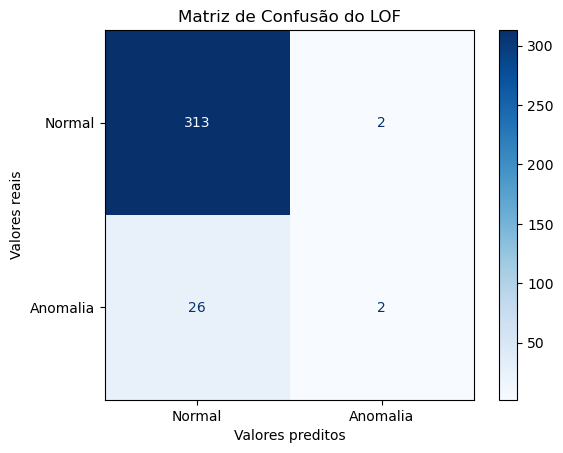

Avaliação do modelo LOF:
LOF ROC:0.8828, precision @ rank n:0.5357
Acurácia=91.84
Precisão=50.0
Recall=7.14
Falso Negativo=26
Falso Positivo=2


In [7]:
from pyod.models.lof import LOF
# train LOF detector
clf_name = 'LOF'
itens = len(X)/2
vizinhos=2
macuracia=0
nv=2
while vizinhos<itens: 
    clf = LOF(n_neighbors=vizinhos,contamination=contamination)
    clf.fit(X)
    y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)        
    ac=accuracy_score(Y,y_train_pred)
    if ac>macuracia:
        nv=vizinhos
        macuracia=ac
    vizinhos=vizinhos+1

print(nv)    

parametros='n_neighbors='+str(nv)+','
contamination=calcula_anomalias(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

Contaminação utilizada=0.01
Avaliação do modelo CBLOF:
CBLOF ROC:0.5108, precision @ rank n:0.0714
Acurácia=91.25364431486881
Precisão=25.0
Recall=3.571428571428571
Falso Positivo=3
Falso Negativo=27
True Positivo=1
True Negativo=312
F1-score=6.25
ROC=0.5107709750566893



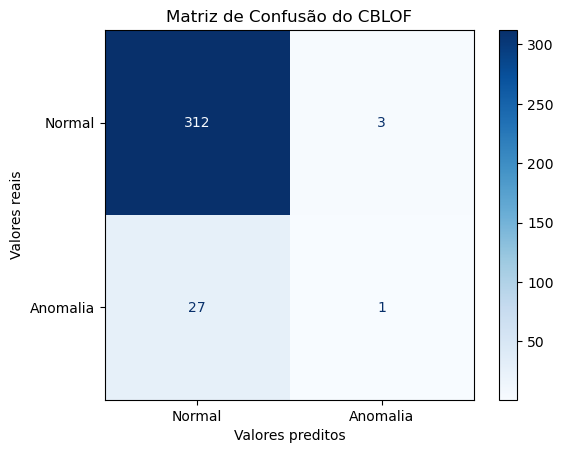

Avaliação do modelo CBLOF:
CBLOF ROC:0.5108, precision @ rank n:0.0714
Acurácia=91.25
Precisão=25.0
Recall=3.57
Falso Negativo=27
Falso Positivo=3


In [8]:
from pyod.models.cblof import CBLOF
# train CBLOF detector
clf_name = 'CBLOF' 
parametros=''
contamination=calcula_anomalias(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

Contaminação utilizada=0.01
Avaliação do modelo COF:
COF ROC:0.5756, precision @ rank n:0.037
Acurácia=90.67055393586006
Precisão=0.0
Recall=0.0
Falso Positivo=4
Falso Negativo=28
True Positivo=0
True Negativo=311
F1-score=0.0
ROC=0.5756235827664399



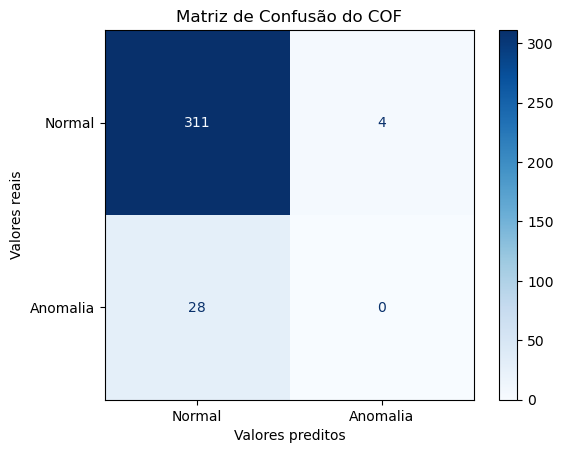

Avaliação do modelo COF:
COF ROC:0.5756, precision @ rank n:0.037
Acurácia=90.67
Precisão=0.0
Recall=0.0
Falso Negativo=28
Falso Positivo=4


In [9]:
from pyod.models.cof import COF
# train COF detector
clf_name = 'COF' 
parametros=''
contamination=calcula_anomalias(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

Contaminação utilizada=0.01
Avaliação do modelo HBOS:
HBOS ROC:0.6345, precision @ rank n:0.3571
Acurácia=91.83673469387756
Precisão=50.0
Recall=7.142857142857142
Falso Positivo=2
Falso Negativo=26
True Positivo=2
True Negativo=313
F1-score=12.5
ROC=0.6345238095238095



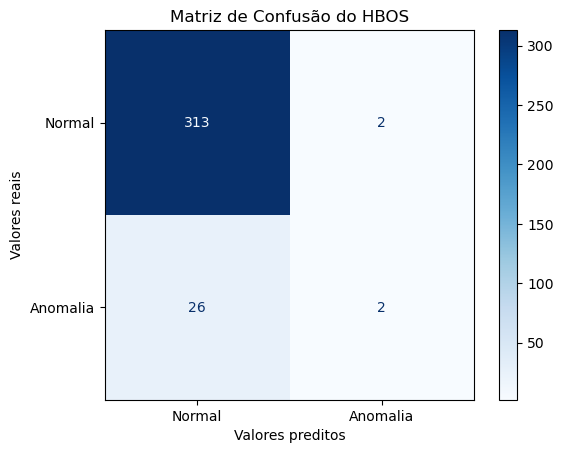

Avaliação do modelo HBOS:
HBOS ROC:0.6345, precision @ rank n:0.3571
Acurácia=91.84
Precisão=50.0
Recall=7.14
Falso Negativo=26
Falso Positivo=2


In [10]:
from pyod.models.hbos import HBOS

# train HBOS detector
clf_name = 'HBOS'
parametros='n_bins=35, alpha=contamination,'
contamination=calcula_anomalias(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

Contaminação utilizada=0.01
Avaliação do modelo KNN:
KNN ROC:0.2334, precision @ rank n:0.0714
Acurácia=91.25364431486881
Precisão=25.0
Recall=3.571428571428571
Falso Positivo=3
Falso Negativo=27
True Positivo=1
True Negativo=312
F1-score=6.25
ROC=0.2334467120181406



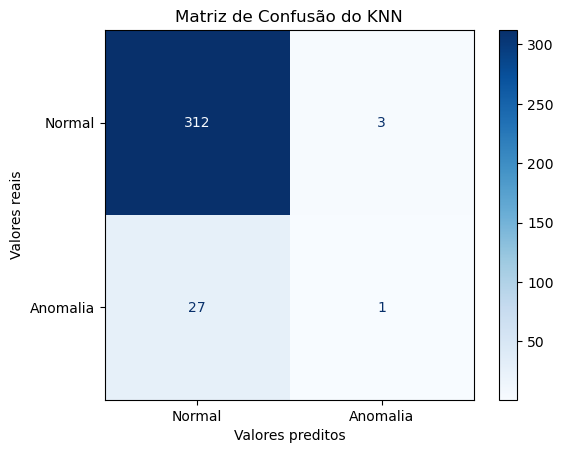

Avaliação do modelo KNN:
KNN ROC:0.2334, precision @ rank n:0.0714
Acurácia=91.25
Precisão=25.0
Recall=3.57
Falso Negativo=27
Falso Positivo=3


In [11]:
from pyod.models.knn import KNN
# train KNN detector
clf_name = 'KNN'
parametros='n_neighbors=35,'
contamination=calcula_anomalias(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

Contaminação utilizada=0.01
Avaliação do modelo SOD:
SOD ROC:0.7431, precision @ rank n:0.25
Acurácia=91.25364431486881
Precisão=25.0
Recall=3.571428571428571
Falso Positivo=3
Falso Negativo=27
True Positivo=1
True Negativo=312
F1-score=6.25
ROC=0.7431405895691611



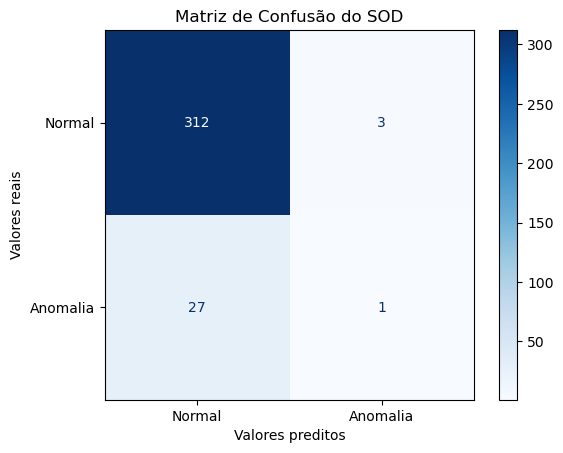

Avaliação do modelo SOD:
SOD ROC:0.7431, precision @ rank n:0.25
Acurácia=91.25
Precisão=25.0
Recall=3.57
Falso Negativo=27
Falso Positivo=3


In [12]:
from pyod.models.sod import SOD
# train SOD detector
clf_name = 'SOD' 
parametros=''
contamination=calcula_anomalias(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

Contaminação utilizada=0.01
Avaliação do modelo COPOD:
COPOD ROC:0.7759, precision @ rank n:0.3214
Acurácia=93.00291545189503
Precisão=100.0
Recall=14.285714285714285
Falso Positivo=0
Falso Negativo=24
True Positivo=4
True Negativo=315
F1-score=25.0
ROC=0.7758503401360545



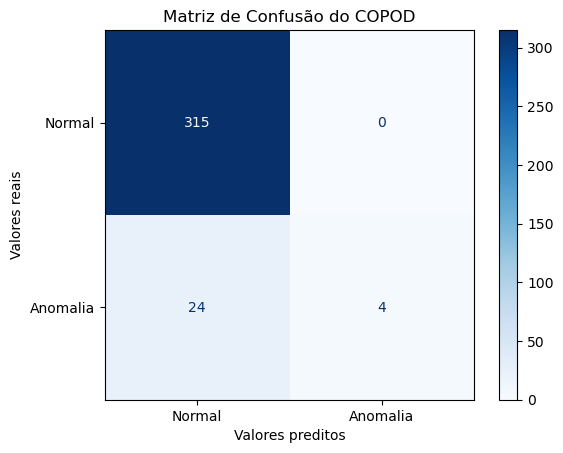

Avaliação do modelo COPOD:
COPOD ROC:0.7759, precision @ rank n:0.3214
Acurácia=93.0
Precisão=100.0
Recall=14.29
Falso Negativo=24
Falso Positivo=0


In [13]:
from pyod.models.copod import COPOD
# train COPOD detector
clf_name = 'COPOD'
parametros=''
contamination=calcula_anomalias(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

Contaminação utilizada=0.02
Avaliação do modelo ECOD:
ECOD ROC:0.9159, precision @ rank n:0.4643
Acurácia=93.87755102040816
Precisão=100.0
Recall=25.0
Falso Positivo=0
Falso Negativo=21
True Positivo=7
True Negativo=315
F1-score=40.0
ROC=0.9159297052154195



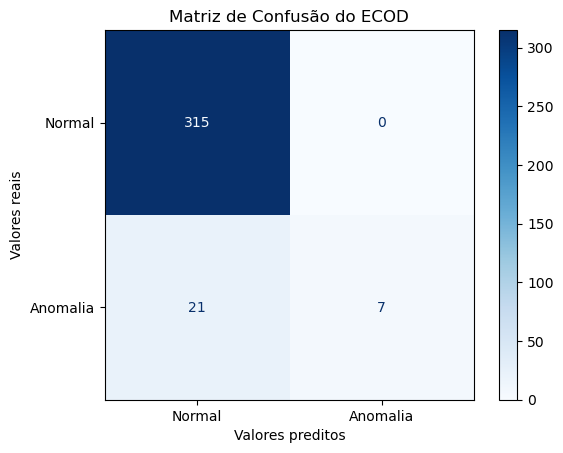

Avaliação do modelo ECOD:
ECOD ROC:0.9159, precision @ rank n:0.4643
Acurácia=93.88
Precisão=100.0
Recall=25.0
Falso Negativo=21
Falso Positivo=0


In [14]:
from pyod.models.ecod import ECOD
# train ECOD detector
clf_name = 'ECOD'
parametros=''
contamination=calcula_anomalias(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

Contaminação utilizada=0.01
Avaliação do modelo IForest:
IForest ROC:0.5838, precision @ rank n:0.2857
Acurácia=91.83673469387756
Precisão=50.0
Recall=7.142857142857142
Falso Positivo=2
Falso Negativo=26
True Positivo=2
True Negativo=313
F1-score=12.5
ROC=0.583843537414966



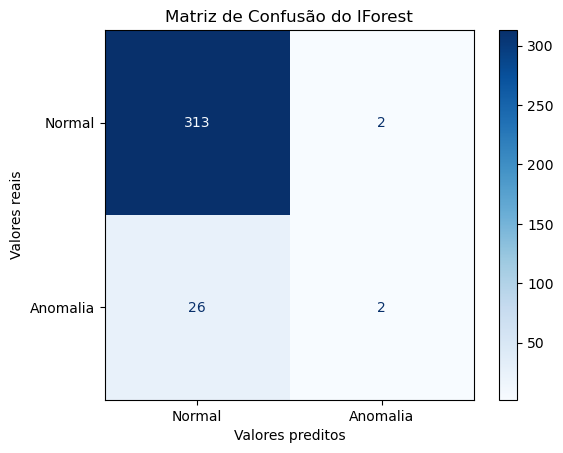

Avaliação do modelo IForest:
IForest ROC:0.5838, precision @ rank n:0.2857
Acurácia=91.84
Precisão=50.0
Recall=7.14
Falso Negativo=26
Falso Positivo=2


In [15]:
from pyod.models.iforest import IForest
# train IForest detector
clf_name = 'IForest'
itens = len(X)
estimadores = len(X)//10
if estimadores<2: estimadores=2

parametros='n_estimators=estimadores,'
contamination=calcula_anomalias(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

Contaminação utilizada=0.02
Avaliação do modelo LODA:
LODA ROC:0.4218, precision @ rank n:0.25
Acurácia=91.54518950437318
Precisão=42.857142857142854
Recall=10.714285714285714
Falso Positivo=4
Falso Negativo=25
True Positivo=3
True Negativo=311
F1-score=17.142857142857142
ROC=0.42182539682539677



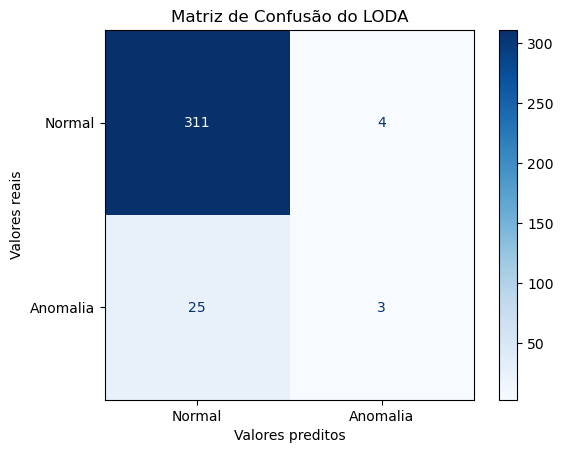

Avaliação do modelo LODA:
LODA ROC:0.4218, precision @ rank n:0.25
Acurácia=91.55
Precisão=42.86
Recall=10.71
Falso Negativo=25
Falso Positivo=4


In [16]:
from pyod.models.loda import LODA
# train LODA detector
clf_name = 'LODA' 
parametros=''
contamination=calcula_anomalias(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

Contaminação utilizada=0.01
Avaliação do modelo DeepSVDD:
DeepSVDD ROC:0.3262, precision @ rank n:0.0357
Acurácia=90.67055393586006
Precisão=0.0
Recall=0.0
Falso Positivo=4
Falso Negativo=28
True Positivo=0
True Negativo=311
F1-score=0.0
ROC=0.32619047619047614



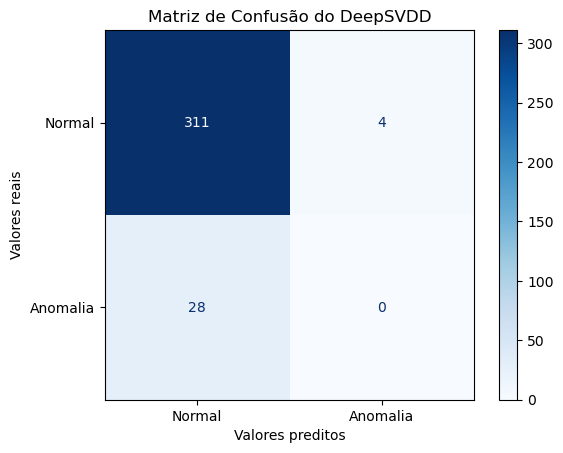

Avaliação do modelo DeepSVDD:
DeepSVDD ROC:0.3262, precision @ rank n:0.0357
Acurácia=90.67
Precisão=0.0
Recall=0.0
Falso Negativo=28
Falso Positivo=4


In [17]:
from pyod.models.deep_svdd import DeepSVDD
# train DeepSVDD detector
clf_name = 'DeepSVDD'
parametros='verbose=0,preprocessing=True,'
contamination=calcula_anomalias(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

Contaminação utilizada=0.01
Avaliação do modelo GMM:
GMM ROC:0.6488, precision @ rank n:0.25
Acurácia=91.25364431486881
Precisão=25.0
Recall=3.571428571428571
Falso Positivo=3
Falso Negativo=27
True Positivo=1
True Negativo=312
F1-score=6.25
ROC=0.6487528344671202



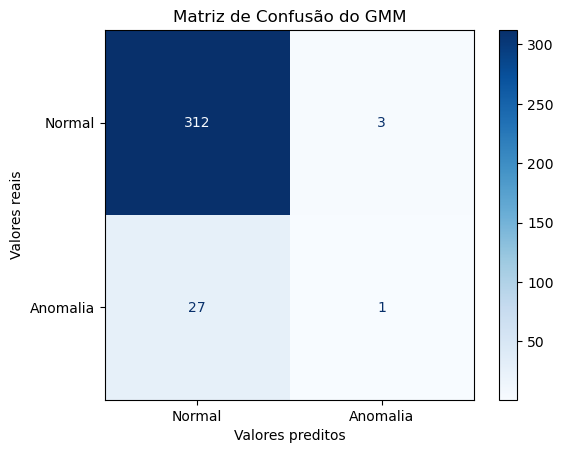

Avaliação do modelo GMM:
GMM ROC:0.6488, precision @ rank n:0.25
Acurácia=91.25
Precisão=25.0
Recall=3.57
Falso Negativo=27
Falso Positivo=3


In [18]:
from pyod.models.gmm import GMM
# train GMM detector
clf_name = 'GMM' 
parametros=''
contamination=calcula_anomalias(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

In [19]:
tabelafinal.sort_values("acuracia", axis = 0, ascending = False,
                 inplace = True, na_position ='last')
print(tabelafinal)

   algoritmo  contaminacao  acuracia  precisao  recall  fn  fp
9       ECOD          0.02     93.88    100.00   25.00  21   0
8      COPOD          0.01     93.00    100.00   14.29  24   0
0        PCA          0.01     92.42     75.00   10.71  25   1
2        LOF          0.01     91.84     50.00    7.14  26   2
5       HBOS          0.01     91.84     50.00    7.14  26   2
10   IForest          0.01     91.84     50.00    7.14  26   2
11      LODA          0.02     91.55     42.86   10.71  25   4
3      CBLOF          0.01     91.25     25.00    3.57  27   3
6        KNN          0.01     91.25     25.00    3.57  27   3
7        SOD          0.01     91.25     25.00    3.57  27   3
13       GMM          0.01     91.25     25.00    3.57  27   3
1      OCSVM          0.01     90.96      0.00    0.00  28   3
4        COF          0.01     90.67      0.00    0.00  28   4
12  DeepSVDD          0.01     90.67      0.00    0.00  28   4
